In [1]:
import gpflow
import gpflux

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
X = np.random.rand(80)*2 - 1
sigma = 0.05
Y = np.sign(X) + np.random.randn(80)*sigma
X = X.reshape(80,1)
Y = Y.reshape(80,1)

In [15]:
num_data = X.shape[0]
output_dim = 1
num_inducing = 50

kernel = gpflow.kernels.SquaredExponential(variance=1, \
                                           lengthscales=1)
inducing_variable = gpflow.inducing_variables.InducingPoints(
    X
)

gp_layer = gpflux.layers.GPLayer(
    kernel, inducing_variable, num_data=num_data, \
    num_latent_gps=output_dim, \
    mean_function=gpflow.mean_functions.Zero()
)


kernel2 = gpflow.kernels.SquaredExponential()
inducing_variable2 = gpflow.inducing_variables.InducingPoints(Z.copy())
gp_layer2 = gpflux.layers.GPLayer(
    kernel2,
    inducing_variable2,
    num_data=num_data,
    num_latent_gps=output_dim,
    mean_function=gpflow.mean_functions.Zero(),
)

In [16]:
likelihood_layer = gpflux.layers.LikelihoodLayer(\
            gpflow.likelihoods.Gaussian(variance=sigma**2))

/var/folders/34/0177579s72zfk8k1ytk34_9c0346k7/T/ipykernel_9623/869598570.py:1: DeprecationWarning: Call to deprecated class TrackableLayer. (GPflux's `TrackableLayer` was prior to TF2.5 used to collect GPflow variables in subclassed layers. As of TF 2.5, `tf.Module` supports this natively and there is no need for `TrackableLayer` anymore. It will be removed in GPflux version `1.0.0`.)
  likelihood_layer = gpflux.layers.LikelihoodLayer(\


In [17]:
single_layer_dgp = gpflux.models.DeepGP([gp_layer], \
                            likelihood_layer)
model = single_layer_dgp.as_training_model()
model.compile(tf.optimizers.Adam(0.01))

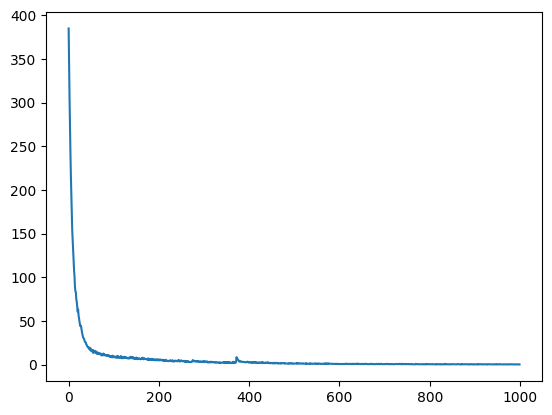

In [18]:
history = model.fit({"inputs": X, "targets": Y}, \
                    epochs=int(1e3), verbose=0)
plt.plot(history.history["loss"])

In [25]:
a = 1.0
N_test = 160
X_test = np.linspace(X.min() - a, X.max() + a, \
                     N_test).reshape(-1, 1)

mymodel = single_layer_dgp.as_prediction_model()
out = mymodel(X_test)
mu = out.f_mean.numpy().squeeze()
var = out.f_var.numpy().squeeze()
X_test = X_test.squeeze()

In [26]:
std = np.sqrt(var)

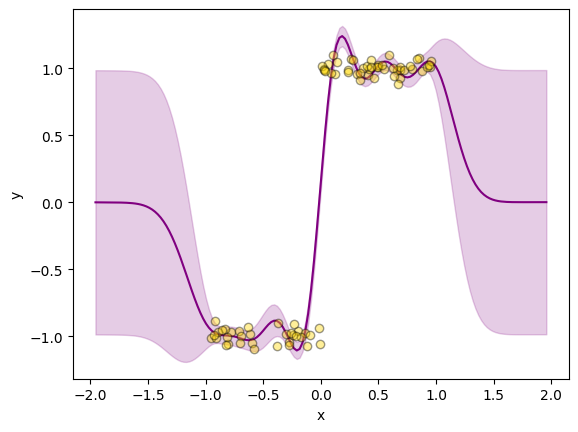

In [27]:
fig = plt.figure()
plt.plot(X_test, mu, color='purple')
plt.fill_between(X_test, mu+std, mu-std, \
                 color='purple', alpha=0.2)
plt.plot(X, Y, 'o', color='gold', ms=6, markeredgecolor='k', \
        alpha=0.4)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('demo.png', dpi=170, \
            bbox_inches='tight', transparent=True)
plt.show()

In [46]:
num_inducing = 20
Z = np.linspace(X.min(), X.max(), num_inducing).reshape(-1, 1)
kernel2 = gpflow.kernels.SquaredExponential(variance=1, \
                                           lengthscales=5)
inducing_variable2 = gpflow.inducing_variables.InducingPoints(Z.copy())
gp_layer2 = gpflux.layers.GPLayer(
    kernel2,
    inducing_variable2,
    num_data=num_data,
    num_latent_gps=output_dim,
    mean_function=gpflow.mean_functions.Zero(),
)

likelihood_layer = gpflux.layers.LikelihoodLayer(\
            gpflow.likelihoods.Gaussian(variance=0.1))
two_layer_dgp = gpflux.models.DeepGP([gp_layer, gp_layer2, gp_layer2], \
                                     likelihood_layer)
model = two_layer_dgp.as_training_model()
model.compile(tf.optimizers.Adam(0.01))

/var/folders/34/0177579s72zfk8k1ytk34_9c0346k7/T/ipykernel_9623/1214556991.py:14: DeprecationWarning: Call to deprecated class TrackableLayer. (GPflux's `TrackableLayer` was prior to TF2.5 used to collect GPflow variables in subclassed layers. As of TF 2.5, `tf.Module` supports this natively and there is no need for `TrackableLayer` anymore. It will be removed in GPflux version `1.0.0`.)
  likelihood_layer = gpflux.layers.LikelihoodLayer(\


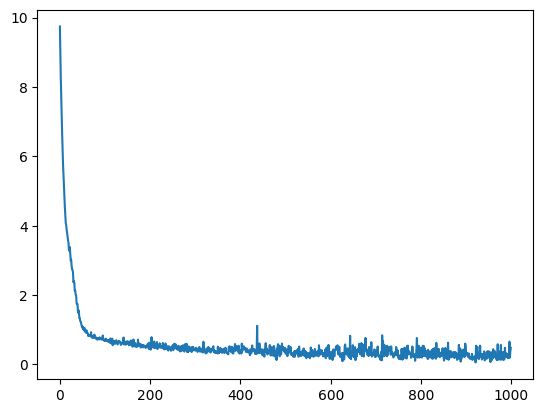

In [47]:
history = model.fit({"inputs": X, "targets": Y}, \
                    epochs=int(1e3), verbose=0)
plt.plot(history.history["loss"])

In [48]:
a = 1.0
N_test = 160
X_test = np.linspace(X.min() - a, X.max() + a, \
                     N_test).reshape(-1, 1)

mymodel = two_layer_dgp.as_prediction_model()
out = mymodel(X_test)
mu = out.f_mean.numpy().squeeze()
var = out.f_var.numpy().squeeze()
X_test = X_test.squeeze()

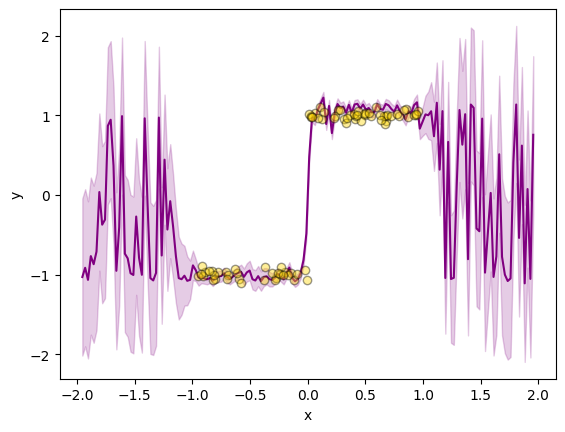

In [49]:
fig = plt.figure()
plt.plot(X_test, mu, color='purple')
plt.fill_between(X_test, mu+std, mu-std, \
                 color='purple', alpha=0.2)
plt.plot(X, Y, 'o', color='gold', ms=6, markeredgecolor='k', \
        alpha=0.4)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('demo2.png', dpi=170, \
            bbox_inches='tight', transparent=True)
plt.show()